In [3]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [7]:
import pandas as pd

# Load the dataset with error handling
dataset_path = "customer_churn_data.csv"
try:
    telecom_data = pd.read_csv(dataset_path)
    print(f"📂 Dataset loaded successfully: {dataset_path}")
except FileNotFoundError:
    print(f"⚠️ File not found: {dataset_path}")
    exit()

# Display basic structure
print("\n🔎 Dataset Overview")
print("Shape:", telecom_data.shape)
print("Column Info:")
telecom_data.info()

# Check for missing values
print("\n🧮 Missing Values (Before Cleaning):")
print(telecom_data.isnull().sum())

# Convert 'monthly_charges' to numeric and handle errors
telecom_data['monthly_charges'] = pd.to_numeric(telecom_data['monthly_charges'], errors='coerce')

# Fill missing values with median
median_charge = telecom_data['monthly_charges'].median()
telecom_data['monthly_charges'].fillna(median_charge, inplace=True)

print("\n✅ Missing Values (After Cleaning):")
print(telecom_data.isnull().sum())

# Summary statistics
print("\n📊 Summary Statistics:")
print(telecom_data.describe(include='all'))

# Preview sample records
print("\n🖼️ First 5 Rows:")
print(telecom_data.head())

📂 Dataset loaded successfully: customer_churn_data.csv

🔎 Dataset Overview
Shape: (10000, 24)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  

/tmp/ipython-input-3851814423.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_data['monthly_charges'].fillna(median_charge, inplace=True)



🔄 Churn Distribution:
churn
No     7728
Yes    2272
Name: count, dtype: int64

📌 Churn Rate: 22.72%


/tmp/ipython-input-190063482.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_churn, palette='Set2')


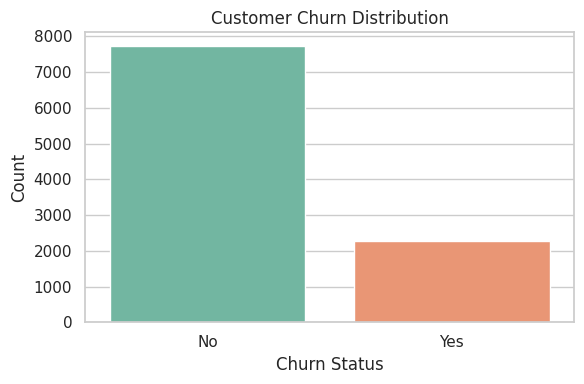

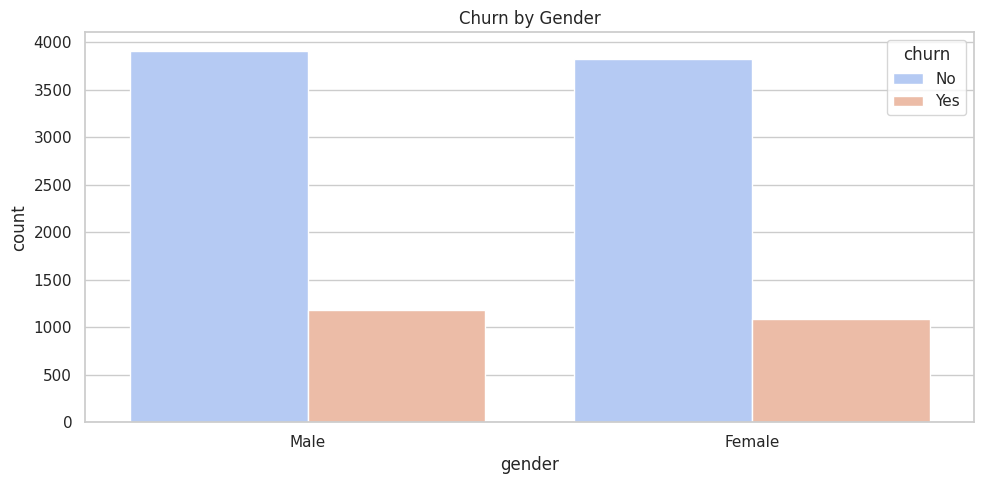

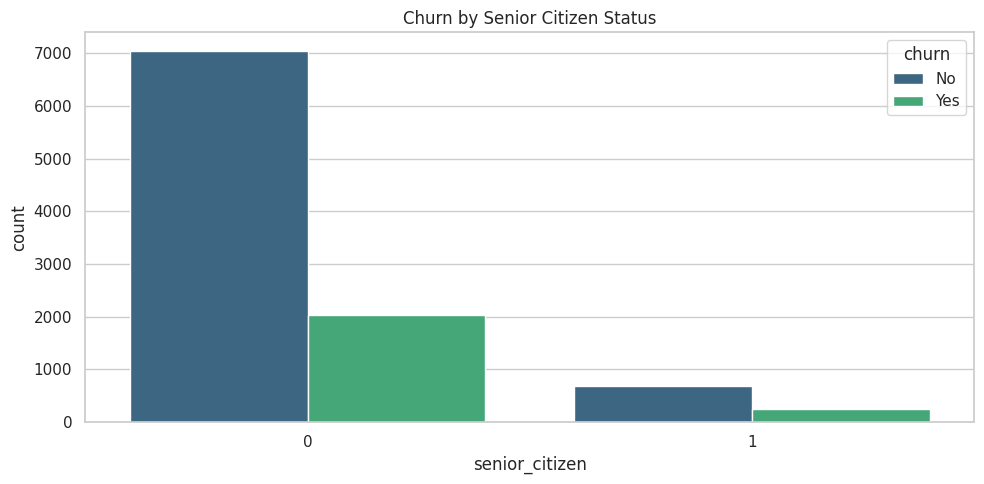

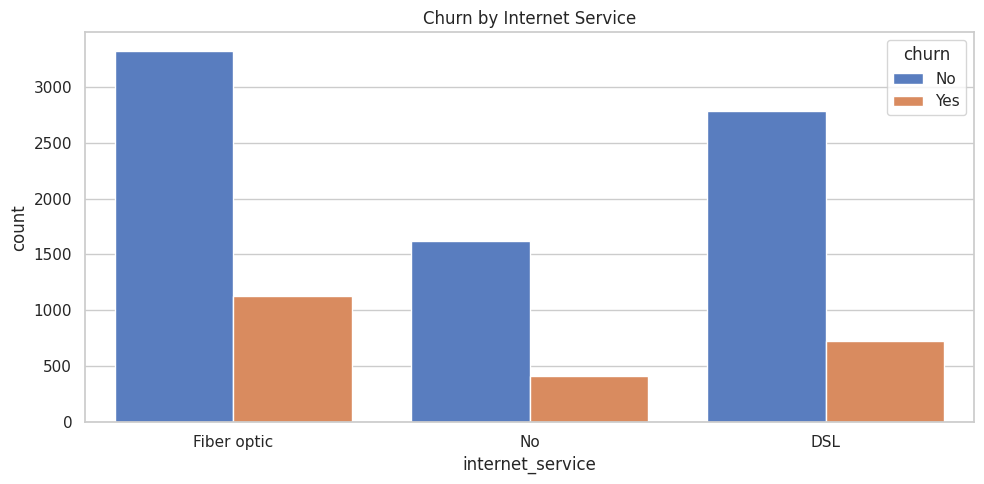

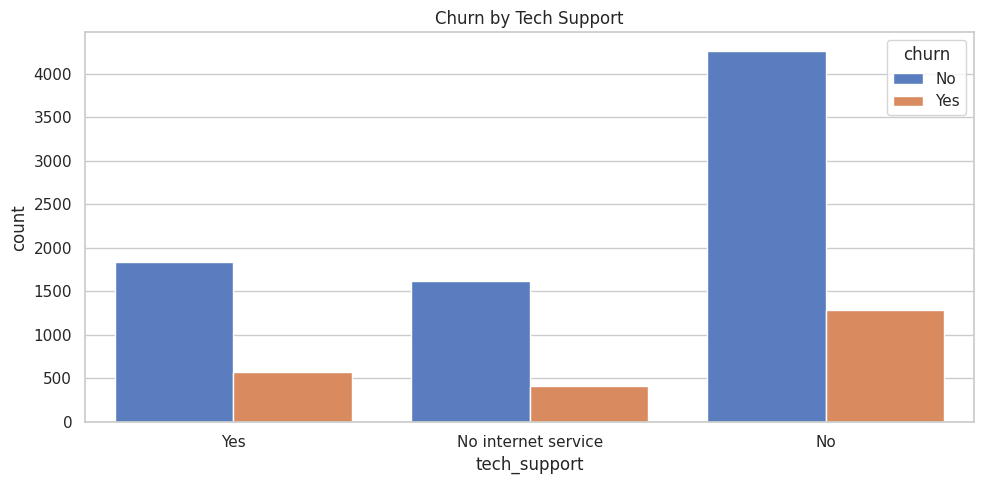

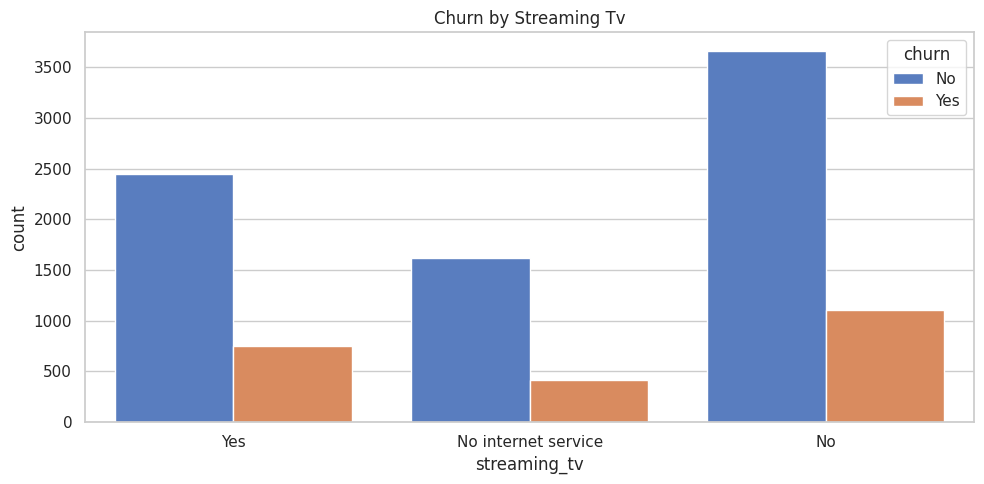

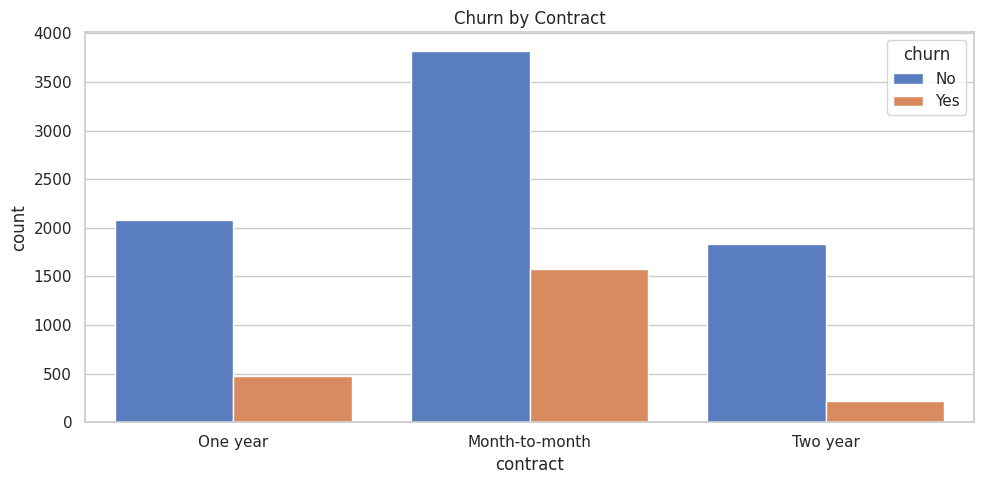

/tmp/ipython-input-190063482.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='monthly_charges', data=df_churn, palette='pastel')


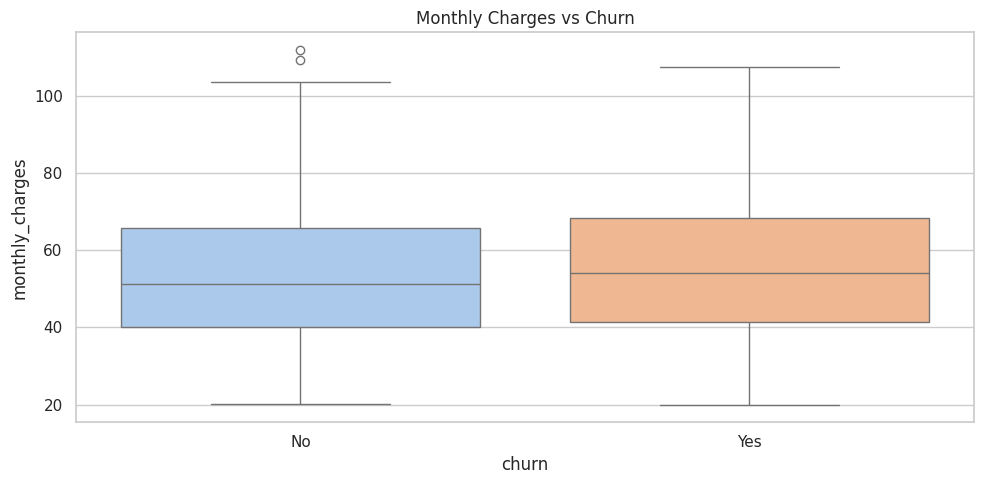

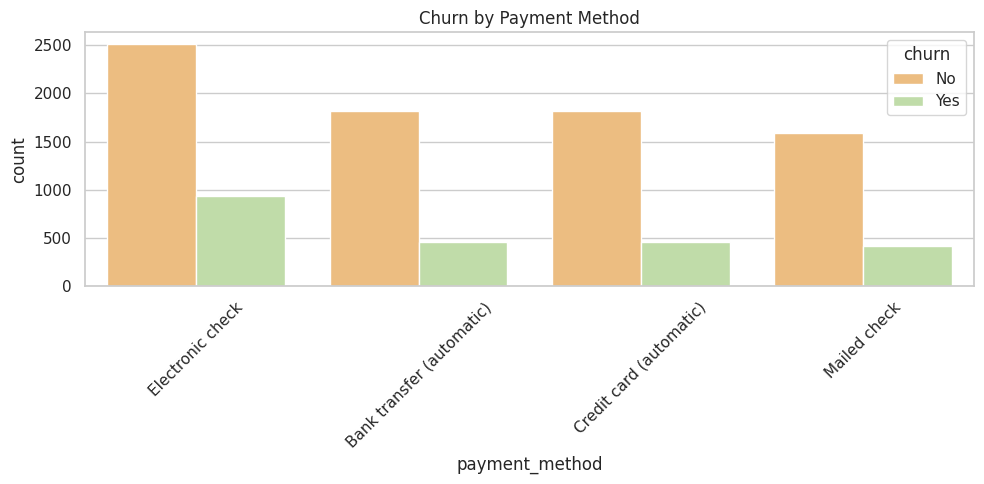


📈 Correlation Matrix:
                            age  senior_citizen    tenure  monthly_charges  \
age                    1.000000        0.582528  0.004662        -0.020607   
senior_citizen         0.582528        1.000000  0.011767        -0.007596   
tenure                 0.004662        0.011767  1.000000        -0.002129   
monthly_charges       -0.020607       -0.007596 -0.002129         1.000000   
total_charges         -0.004008        0.008191  0.899546         0.317016   
customer_satisfaction -0.003517       -0.007611 -0.002833         0.001220   
support_calls         -0.014092       -0.000447 -0.008804         0.016304   

                       total_charges  customer_satisfaction  support_calls  
age                        -0.004008              -0.003517      -0.014092  
senior_citizen              0.008191              -0.007611      -0.000447  
tenure                      0.899546              -0.002833      -0.008804  
monthly_charges             0.317016        

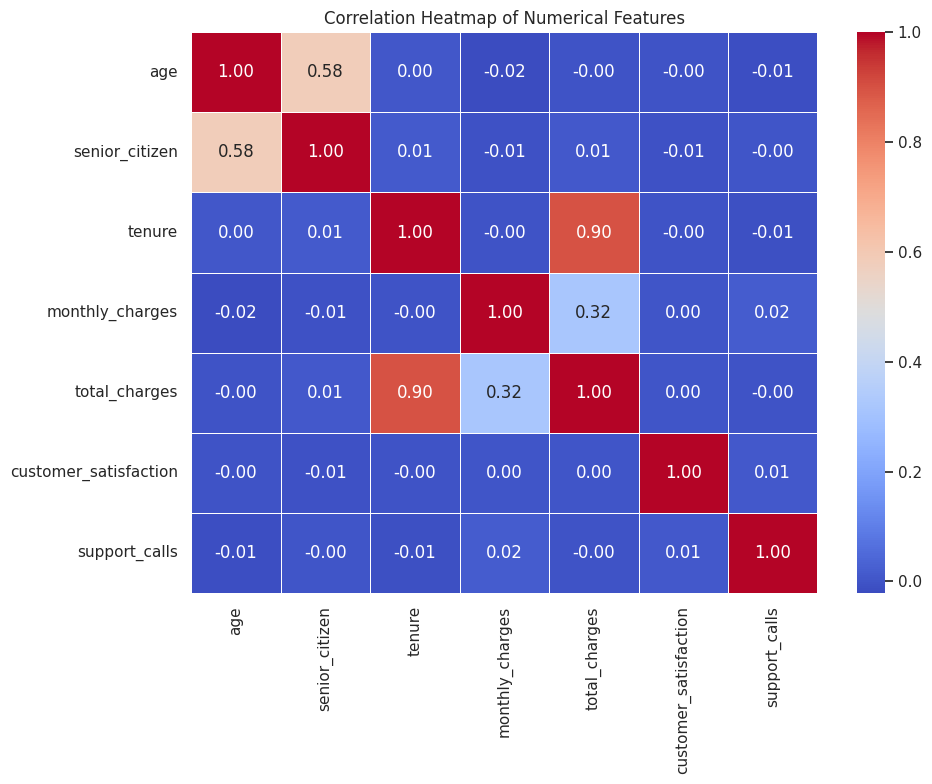

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = "customer_churn_data.csv"
df_churn = pd.read_csv(data_path)

# Set plot style
sns.set(style="whitegrid")

# 1️⃣ Churn Distribution & Rate
print("\n🔄 Churn Distribution:")
print(df_churn['churn'].value_counts())

churn_rate = df_churn['churn'].value_counts(normalize=True)['Yes'] * 100
print(f"\n📌 Churn Rate: {churn_rate:.2f}%")

# Visualize churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df_churn, palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2️⃣ Demographic Patterns
plt.figure(figsize=(10,5))
sns.countplot(x='gender', hue='churn', data=df_churn, palette='coolwarm')
plt.title("Churn by Gender")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='senior_citizen', hue='churn', data=df_churn, palette='viridis')
plt.title("Churn by Senior Citizen Status")
plt.tight_layout()
plt.show()

# 3️⃣ Service Usage Impact
service_cols = ['internet_service', 'tech_support', 'streaming_tv', 'contract']
for col in service_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='churn', data=df_churn, palette='muted')
    plt.title(f"Churn by {col.replace('_', ' ').title()}")
    plt.tight_layout()
    plt.show()

# 4️⃣ Financial Factors & Payment Method
plt.figure(figsize=(10,5))
sns.boxplot(x='churn', y='monthly_charges', data=df_churn, palette='pastel')
plt.title("Monthly Charges vs Churn")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='payment_method', hue='churn', data=df_churn, palette='Spectral')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5️⃣ Correlation Analysis
# Select numerical features
numeric_features = df_churn.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_features.corr()

print("\n📈 Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load raw dataset
df_raw = pd.read_csv("customer_churn_data.csv")

# 1️⃣ Encode Categorical Variables
categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'churn']  # exclude target

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_raw[col] = le.fit_transform(df_raw[col])
    label_encoders[col] = le

# Encode target variable
df_raw['churn'] = df_raw['churn'].map({'Yes': 1, 'No': 0})

# 2️⃣ Scale Numerical Features
numerical_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('churn')  # exclude target

scaler = StandardScaler()
df_raw[numerical_cols] = scaler.fit_transform(df_raw[numerical_cols])

# 3️⃣ Feature Engineering (Optional)
df_raw['tenure_group'] = pd.cut(df_raw['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])
df_raw['tenure_group'] = df_raw['tenure_group'].astype(str)
df_raw['tenure_group'] = LabelEncoder().fit_transform(df_raw['tenure_group'])

# 4️⃣ Split Data
X = df_raw.drop('churn', axis=1)
y = df_raw['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5️⃣ Save Cleaned Dataset
df_raw.to_csv("customer_churn_cleaned.csv", index=False)
print("📁 Cleaned dataset saved as 'customer_churn_cleaned.csv'")

# Final confirmation
print("✅ Data preprocessing complete.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

📁 Cleaned dataset saved as 'customer_churn_cleaned.csv'
✅ Data preprocessing complete.
Training set shape: (8000, 24)
Test set shape: (2000, 24)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 📥 Load preprocessed data
df = pd.read_csv("customer_churn_cleaned.csv")

# 🎯 Split features and target
X = df.drop('churn', axis=1)
y = df['churn']

# 🔀 Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🧠 Define models and hyperparameter grids
model_configs = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
    },
    "SVM": {
        "model": SVC(),
        "params": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# 🧪 Train models and store results
trained_models = {}
validation_scores = {}

for name, config in model_configs.items():
    grid = GridSearchCV(config["model"], config["params"], cv=5)
    grid.fit(X_train, y_train)
    trained_models[name] = grid.best_estimator_
    validation_scores[name] = accuracy_score(y_val, grid.predict(X_val))
    print(f"✅ {name} trained. Best Params: {grid.best_params_}")

# 📊 Display Validation Accuracy
print("\n🔍 Model Performance on Validation Set:")
for name, acc in validation_scores.items():
    print(f"{name}: {acc:.4f}")

# 🏆 Best Model Report
best_model_name = max(validation_scores, key=validation_scores.get)
print(f"\n🏆 Best Performing Model: {best_model_name}")
print("Classification Report:")
print(classification_report(y_val, trained_models[best_model_name].predict(X_val)))

✅ Logistic Regression trained. Best Params: {'C': 0.1, 'solver': 'liblinear'}
✅ Decision Tree trained. Best Params: {'max_depth': 3, 'min_samples_split': 2}
✅ Random Forest trained. Best Params: {'max_depth': 10, 'n_estimators': 100}
✅ SVM trained. Best Params: {'C': 1, 'kernel': 'rbf'}

🔍 Model Performance on Validation Set:
Logistic Regression: 0.7915
Decision Tree: 0.7885
Random Forest: 0.7930
SVM: 0.7795

🏆 Best Performing Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1546
           1       0.67      0.17      0.28       454

    accuracy                           0.79      2000
   macro avg       0.74      0.57      0.58      2000
weighted avg       0.77      0.79      0.74      2000




🔍 Validation Metrics Comparison:

📌 Logistic Regression
Accuracy: 0.7915
Precision: 0.6350
Recall: 0.1916
F1-Score: 0.2944

📌 Decision Tree
Accuracy: 0.7885
Precision: 0.6505
Recall: 0.1476
F1-Score: 0.2406

📌 Random Forest
Accuracy: 0.7930
Precision: 0.6695
Recall: 0.1740
F1-Score: 0.2762

📌 SVM
Accuracy: 0.7795
Precision: 0.5867
Recall: 0.0969
F1-Score: 0.1664


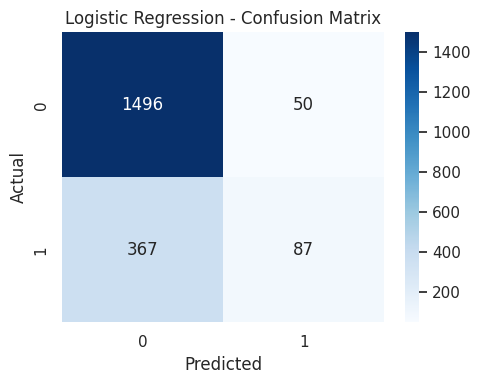

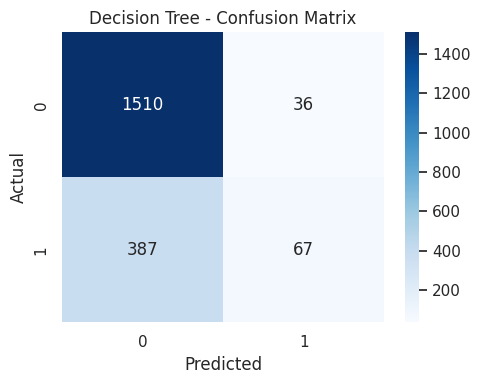

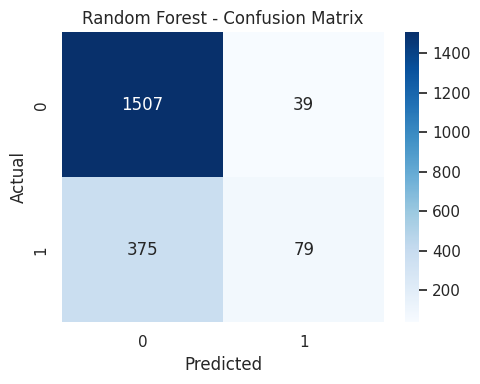

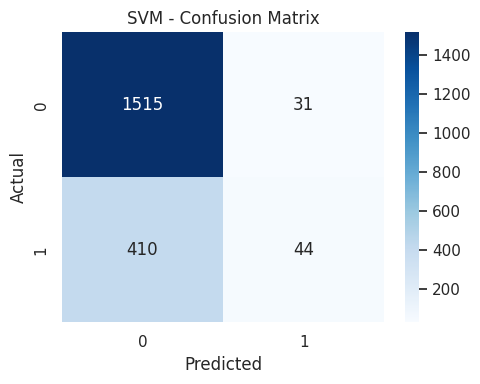


✅ Best Model Selected: Logistic Regression

📈 Test Set Performance:
Accuracy: 0.7915
Precision: 0.6350
Recall: 0.1916
F1-Score: 0.2944

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1546
           1       0.64      0.19      0.29       454

    accuracy                           0.79      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.76      0.79      0.75      2000



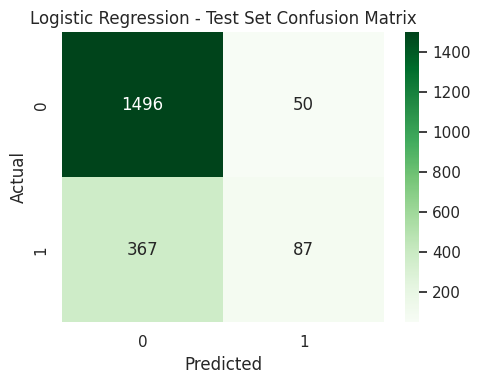

In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Use trained_models from Task 4
# trained_models = { ... } already defined

# 🧪 Evaluate on validation set
val_metrics = {}

for name, model in trained_models.items():
    y_val_pred = model.predict(X_val)
    val_metrics[name] = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1-Score": f1_score(y_val, y_val_pred),
        "Confusion Matrix": confusion_matrix(y_val, y_val_pred)
    }

# 📊 Display metrics
print("\n🔍 Validation Metrics Comparison:")
for model_name, metrics in val_metrics.items():
    print(f"\n📌 {model_name}")
    for metric_name, value in metrics.items():
        if metric_name != "Confusion Matrix":
            print(f"{metric_name}: {value:.4f}")

# 🔲 Plot confusion matrices
for model_name, metrics in val_metrics.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 🏆 Select best model based on F1-Score
best_model_name = max(val_metrics, key=lambda x: val_metrics[x]["F1-Score"])
best_model = trained_models[best_model_name]

print(f"\n✅ Best Model Selected: {best_model_name}")

# 🧪 Final Test Set Evaluation
y_test_pred = best_model.predict(X_test)

print("\n📈 Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 🔲 Confusion matrix for test set
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Greens')
plt.title(f"{best_model_name} - Test Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()